In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import re
import numpy as np
import pickle
import time
import pandas as pd
import matplotlib.pyplot as plt
import os, sys
import json

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from preprocess.clean_and_tokenize import clean_and_tokenize_one

[nltk_data] Downloading package punkt to /Users/sueliu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Must apply countvectorizer on the original data

In [4]:
with open('../output/lda_45_topics.pkl', 'rb') as f:
    data = pickle.load(f)

In [5]:
lda_model = data['model']
vectorizer = data['vectorizer']

In [287]:
def drop_nw(doc):
    return re.sub('nationwide', '', doc)

In [ ]:
def plot_nw_complaints_stats(nw):
    nw['date'] = pd.to_datetime(nw['date_time'])
    nw.index = nw['date']
    val = pd.DataFrame(nw.resample('M').count()['date_time'])
    val.columns = ['No. of complaints']
    
    f, ax = plt.subplots(figsize=(10, 6))
    ax.set_title('Weekly counts of Nationwide Complaints')
    val.plot(ax=ax, kind='bar')

In [375]:
data = {'model': lda_model, 'vectorizer': vectorizer}
with open('../output/lda_45_topics.pkl', 'wb') as f:
    pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)

In [27]:
def predict_complaint_topics(lda_model, vectorizer, complaints_df, 
                               text_field = 'compliant_text_cleaned',
                               n_topics=45, topic_map=None,
                               top_n=5):
    """
    Predict the top_n topics with probability.
    
    Parameters
    ----------
    lda_model - Latent Dirichlet Model trained on US data
    vectorizer - CountVectorizer trained on US data
    complaint_df - Pandas Dataframe: all complaint info as a Dataframe
    text_field - string: the field name containing complaint text
    
    n_topics - int: number of topics in the US data
    topic_map - dict: topic to description map
    top_n - int: top N topics to be displayed.
    
    Returns
    -------
    dict: {'original_narrative': text, 
           'topics': {topic_idx', 'topic_name', 'topic_prob'}}
    """
    if topic_map is None:
        print('Need topic index to description mapping!!! Stop now and check!!!')
        return
    
    complaints_df['cleaned'] = complaints_df[text_field].apply(clean_and_tokenize_one)

    vectorized = vectorizer.transform(complaints_df['cleaned'])
    topics = lda_model.transform(vectorized)
    
    all_output = []
    for i in range(topics_all.shape[0]):
        output = dict()
        output['Original narrative'] = complaints_df[text_field][i]
        topic_indices = np.argsort(topics[i, :])[::-1]
        topic_prob = np.sort(topics[i, :])[::-1]
    
        topics_data = {}
        for importance_count, [idx, prob] in enumerate(list(zip(topic_indices, topic_prob))[:top_n]):
            topics_data[importance_count] = {'topic_idx': idx, 
                           'topic_name': topic_map[int(idx)],
                           'topic_prob': prob}
        output['topics'] = topics_data
        all_output.append(output)
    return all_output

In [20]:
def gen_topic_map():
    topic_map = pd.read_excel('../data/topics_matching.xlsx').dropna()[['ID', 'Summarized Topic Name']]
    topic_map['ID'] = topic_map['ID'].astype(int)
    topic_map = topic_map.set_index('ID')
    topic_map = list(topic_map.to_dict().values())[0]
    return topic_map

In [21]:
topic_map = gen_topic_map()

In [29]:
output = predict_complaint_topics(lda_model, vectorizer, complaints_df, 
                               text_field = 'compliant_text_cleaned',
                               n_topics=45, topic_map=topic_map,
                               top_n=5)

In [7]:
complaints_df = pd.read_csv('../data/Nationwide_complaints.csv', index_col='Unnamed: 0')

text_field = 'compliant_text_cleaned'
complaints_df['cleaned'] = complaints_df[text_field].apply(clean_and_tokenize_one)

vectorized = vectorizer.transform(complaints_df['cleaned'])
topics_all = lda_model.transform(vectorized)

In [ ]:
summarized_df = pd.read_csv('../output/with_summarized.csv')

In [303]:
complaint_id = df['Complaint ID'][idx]
summarized_df[summarized_df['Complaint ID'] == complaint_id]['summarized'].values[0]

"Upon my noticing I immediately contacted Capital One fraud department and they informed me that wouldn't be responsible for any of the charges because of zero liability and I didn't have the card. I informed that I didn't/do n't have the card so how could I be responsible for charges when I didn't make them and also informed him there is no evidence that would even suggest I did or no proof!! The total charges amount came up to {$3900.00} and I would never run up that amount or spend that at one time. I didn't have the card, didn't authorize any one on my behalf to use and also contacted them as soon as I notice. I did not make those charges and was informing but they didn't care to listen at all."

In [294]:
lda_topics = lda_model.transform(X)

Original text: I was a victim of fraud which was quite unfortunate. My information was stolen and I later found out that my card had been used to make purchases. There was a spending spree that tool place and doesn't match any of my spending habits or patterns and wouldn't do. Upon my noticing I immediately contacted Capital One fraud department and they informed me that wouldn't be responsible for any of the charges because of zero liability and I didn't have the card. There were several charges spanning from XXXX. I received a letter recently informing me that investigation was completed and no fraud found. How?!! That isn't possible. I contacted rep on letter and after several attempts finally got to talk to him and he was very rude, harsh and dismissive of me. A terrible experience. I informed that I didn't/do n't have the card so how could I be responsible for charges when I didn't make them and also informed him there is no evidence that would even suggest I did or no proof!! Thi

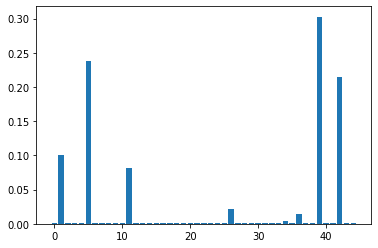

In [302]:
idx = 19835

plt.bar(np.arange(45), lda_topics[idx, :])
print('Original text:', df['Consumer complaint narrative'].values[idx])
print()
print('Original issue:', df['Issue'].values[idx])
print('Sorted order of importance:')
print(np.argsort(lda_topics[idx, :])[::-1])

In [308]:
X_Predict = vectorizer.transform(nw['cleaned'].dropna())
lda_topics2 = lda_model.transform(X_Predict)

2019-08-13T03:42:31Z

Original text: Worst bank ever know,couldn't get my own  money out of my account yet again,updated banking app that doesn't ever work,couldn't top my phone up and needed to call fire brigade as a fire had started near bury st Edmunds so if I never drove to the fire station in Brandon alot of wildlife and trees would of died,and I would put the blame onto nationwide,I'm changing banks now as thay are the worst company /bank ever,and because thay wouldn't let me take my own money out of the bank thay could of caused a big impact on the environment as couldn't top my phone up to call fire brigade,avoid avoid avoid,update fraud prevention perhaps thay need to learn how to use their own software
Sorted order of importance:
[30  5 23 25 20  2 42 34 17 21 32 11 29 36 31  7  8 12 38 39 35 43 10 19
 14 26  1  0 15 16 24  6 41  9 13 18  4  3 28 44 40 27 22 33 37]

Customer support 
 Access to bank account 



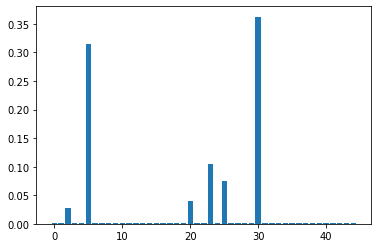

In [316]:
idx = 92
print(nw['date_time'].values[idx])
print()
plt.bar(np.arange(45), lda_topics2[idx, :])
print('Original text:', nw['compliant_text_cleaned'].values[idx])
print('Sorted order of importance:')
print(np.argsort(lda_topics2[idx, :])[::-1])
print()
print('Customer support \nAccess to bank account \n')